In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
import scipy.stats as st

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import suppression as s
import utils
import linear_model

In [4]:
gaba_fn = 'gaba_data.txt'
supp_fn = 'supp_data_individual_20170427.txt'

In [5]:
sdf = utils.load_psychophys(supp_fn)
gdf = utils.load_gaba(gaba_fn)

In [6]:
plot_dir = "plots/redo-201807"

## Analyze tasks separately (before subsetting to include common subjects)##

In [8]:
pp_subjs = np.unique(sdf.Subject)
n_pp_subjs = len(pp_subjs)
gaba_subjs = np.unique(gdf.subjName)
n_gaba_subjs = len(gaba_subjs)
print(f"Psychophysics subjects (n={n_pp_subjs}):\n", pp_subjs)
print(f"GABA subjects (n={n_gaba_subjs}):\n", gaba_subjs)

Psychophysics subjects (n=37):
 ['ah' 'ai' 'am' 'ap' 'bi' 'bo' 'cl' 'cr' 'ct' 'dl' 'ds' 'eg' 'ei' 'em' 'es'
 'gd' 'gm' 'gw' 'jd' 'jv' 'ke' 'kw' 'li' 'ls' 'mg' 'mk' 'ms' 'mv' 'nl' 'nn'
 'rn' 'sd' 'se' 'tj' 'tm' 'tt' 'yl']
GABA subjects (n=31):
 ['ac' 'ai' 'am' 'as' 'bi' 'ch' 'cr' 'cs' 'ct' 'dl' 'ei' 'em' 'es' 'gd' 'gm'
 'jd' 'jm' 'jv' 'ks' 'kw' 'li' 'ls' 'mg' 'mk' 'ms' 'nl' 'ps' 'rn' 'sd' 'tt'
 'yl']


# GABA only analyses

### GABA t-test, CON v AMB

In [9]:
pop_group = gdf.groupby("Population")
pop_group.describe()

GABA                                                           
           count      mean       std    min     25%     50%      75%    max
Population                                                                 
Amblyope    16.0  0.202312  0.013385  0.179  0.1925  0.2025  0.21125  0.227
Control     15.0  0.206333  0.016482  0.173  0.1925  0.2110  0.21650  0.228

In [10]:
gaba_per_group = [col for col_name, col in pop_group['GABA']]
(tstat, pval) = st.ttest_ind(*gaba_per_group)
print(tstat, pval)

-0.747810754413 0.460595837907


Thus we find no significant difference in GABA levels between CON and AMB.

### GABA violin plot, all subjects

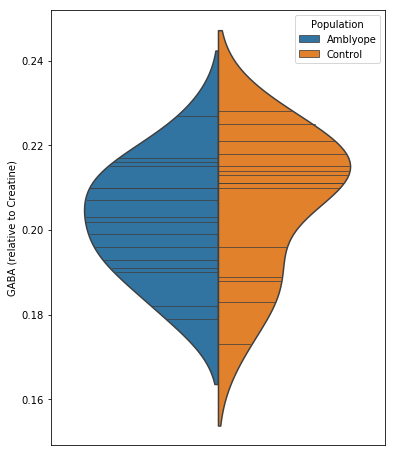

In [11]:
with s.PdfPages(f"{plot_dir}/gaba_diffs_n{n_gaba_subjs}.pdf") as pdf:
    fig = plt.figure(figsize=(6,8))  # create a figure object
    ax = fig.add_subplot(1, 1, 1)
    ax = sns.violinplot(y='GABA',x='Presentation',hue='Population',data=gdf,split=True,inner='stick',ax=ax)
    ax.xaxis.set_visible(False)
    ax.set_ylabel("GABA (relative to Creatine)")
    plt.show(ax.figure)
    pdf.savefig(ax.figure)
    plt.close(ax.figure)
    plt.close('all')

# Select one psychophysical task's data #

In [12]:
task = 'SS'
sdf = sdf[sdf['Task']==task]

## Find the RelMaskContrast at which NDE and DE most different within population using t-tests

### New way, moving the old way to functions in utils.py, 7-12-18

In [13]:
gvars_test = ['Task','Orientation','Presentation','Population']
# equal_var=False makes it Welch's t-test, which does not assume the grooups have equal variance
df_to_model = utils.find_xvalue_to_predict(sdf, gvars_test, test_func=st.ttest_ind, equal_var=False)

There are 8 bins in this condition.
('SS', 'Cross', 'nDicho', 'Amblyope', 1), Bin Center at RelMaskContrast=0.792
[ 1.921  1.434  0.805  1.043] <= NDE ThreshElevs, n=4
[ 0.947  1.026  0.807] <= DE ThreshElevs, n=3
('SS', 'Cross', 'nDicho', 'Amblyope', 1), Bin Center at RelMaskContrast=0.792
[ 1.921  1.434  0.805  1.043] <= NDE ThreshElevs, n=4
[ 0.947  1.026  0.807] <= DE ThreshElevs, n=3
('SS', 'Cross', 'nDicho', 'Amblyope', 2), Bin Center at RelMaskContrast=1.432
[ 1.23   1.056  1.057  2.058  1.112  1.755  0.888  1.296  1.229  1.076] <= NDE ThreshElevs, n=10
[ 0.859  0.542  0.98   0.642] <= DE ThreshElevs, n=4
('SS', 'Cross', 'nDicho', 'Amblyope', 3), Bin Center at RelMaskContrast=2.6039999999999996
[ 1.629  1.378  2.68   0.989  3.318  1.007  1.459  0.68   1.555  1.14 ] <= NDE ThreshElevs, n=10
[ 0.505  1.014  1.093  0.759  0.964  0.867  1.099  1.177  0.718] <= DE ThreshElevs, n=9
('SS', 'Cross', 'nDicho', 'Amblyope', 4), Bin Center at RelMaskContrast=4.526
[ 1.783  1.275  1.585  4.8

[ 0.968  0.888  1.265  1.223  1.078  1.227  0.91   0.637  1.112] <= NDE ThreshElevs, n=9
[ 0.914  0.425  1.211  0.993  1.163  1.386  1.373  0.842  1.561  1.036] <= DE ThreshElevs, n=10
('SS', 'Cross', 'nMono', 'Amblyope', 6), Bin Center at RelMaskContrast=6.995
[ 1.232  0.815  1.034  1.327  1.082  0.974  1.785] <= NDE ThreshElevs, n=7
[ 0.552  1.533  1.391  1.625  1.654] <= DE ThreshElevs, n=5
('SS', 'Cross', 'nMono', 'Amblyope', 7), Bin Center at RelMaskContrast=11.247
[ 1.521  0.977  1.385  1.251] <= NDE ThreshElevs, n=4
[ 1.632  0.968  1.611  1.922  1.096] <= DE ThreshElevs, n=5
('SS', 'Cross', 'nMono', 'Amblyope', 8), Bin Center at RelMaskContrast=16.802
[ 1.492  1.532  1.175  1.041  2.405] <= NDE ThreshElevs, n=5
[] <= DE ThreshElevs, n=0
A group with no obs, skipping
  Task Orientation Presentation Population  BinNumber    pvalue
0   SS       Cross        nMono   Amblyope          1  0.192677
1   SS       Cross        nMono   Amblyope          2  0.022394
2   SS       Cross      

0.971 54
0.925 88
4.33 51
7.257 49
2.511 54
2.438 85
1.463 53
0.878 54
1.599 54
1.552 85


In [14]:
df_to_model.columns

Index(['Subject', 'Task', 'Presentation', 'Orientation', 'Eye', 'Population',
       'MaskContrast', 'ThreshElev', 'ThreshElev_SE', 'RelMaskContrast',
       'Trace', 'BaselineThresh', 'BinCenterRelMaskContrast', 'BinNumber',
       'logThreshElev', 'BinNumberToPred', 'RelMCToPred'],
      dtype='object')

In [15]:
df_to_model.groupby(gvars_test + ["Eye"])[["BinNumberToPred", "RelMCToPred"]].describe()

BinNumberToPred                 \
                                                       count mean  std  min   
Task Orientation Presentation Population Eye                                  
SS   Cross       nDicho       Amblyope   De             51.0  5.0  0.0  5.0   
                                         Nde            49.0  5.0  0.0  5.0   
                              Control    De             54.0  1.0  0.0  1.0   
                                         Nde            84.0  1.0  0.0  1.0   
                 nMono        Amblyope   De             53.0  2.0  0.0  2.0   
                                         Nde            52.0  2.0  0.0  2.0   
                              Control    De             54.0  1.0  0.0  1.0   
                                         Nde            88.0  1.0  0.0  1.0   
     Iso         nDicho       Amblyope   De             51.0  5.0  0.0  5.0   
                                         Nde            49.0  5.0  0.0  5.0   
                              Control    De             54.0  3.0  0.0  3.0   
                                         Nde            85.0  3.0  0.0  3.0   
                 nMono        Amblyope   De             53.0  2.0  0.0  2.0   
                                         Nde            54.0  2.0  0.0  2.0   
                              Control    De             54.0  2.0  0.0  2.0   
                                         Nde            85.0  2.0  0.0  2.0   

                                                                 RelMCToPred  \
                                              25%  50%  75%  max       count   
Task Orientation Presentation Population Eye                                   
SS   Cross       nDicho       Amblyope   De   5.0  5.0  5.0  5.0        51.0   
                                         Nde  5.0  5.0  5.0  5.0        49.0   
                              Control    De   1.0  1.0  1.0  1.0        54.0   
                                         Nde  1.0  1.0  1.0  1.0        84.0   
                 nMono        Amblyope   De   2.0  2.0  2.0  2.0        53.0   
                                         Nde  2.0  2.0  2.0  2.0        52.0   
                              Control    De   1.0  1.0  1.0  1.0        54.0   
                                         Nde  1.0  1.0  1.0  1.0        88.0   
     Iso         nDicho       Amblyope   De   5.0  5.0  5.0  5.0        51.0   
                                         Nde  5.0  5.0  5.0  5.0        49.0   
                              Control    De   3.0  3.0  3.0  3.0        54.0   
                                         Nde  3.0  3.0  3.0  3.0        85.0   
                 nMono        Amblyope   De   2.0  2.0  2.0  2.0        53.0   
                                         Nde  2.0  2.0  2.0  2.0        54.0   
                              Control    De   2.0  2.0  2.0  2.0        54.0   
                                         Nde  2.0  2.0  2.0  2.0        85.0   

                                                                          \
                                               mean           std    min   
Task Orientation Presentation Population Eye                               
SS   Cross       nDicho       Amblyope   De   4.330  4.485081e-15  4.330   
                                         Nde  7.257  3.589530e-15  7.257   
                              Control    De   0.879  3.361944e-16  0.879   
                                         Nde  0.991  1.116891e-16  0.991   
                 nMono        Amblyope   De   1.463  6.725084e-16  1.463   
                                         Nde  0.878  0.000000e+00  0.878   
                              Control    De   0.971  1.344777e-15  0.971   
                                         Nde  0.925  1.563220e-15  0.925   
     Iso         nDicho       Amblyope   De   4.330  4.485081e-15  4.330   
                                         Nde  7.257  3.589530e-15  7.257   
                              Cont

In [16]:
n_pp_subjs_thistask = len(np.unique(df_to_model.Subject))
n_amb_subjs_thistask = len(np.unique((df_to_model[df_to_model['Population']=='Amblyope'])['Subject']))
print(f"There are {n_pp_subjs_thistask} subjects for Task {task}, of which {n_amb_subjs_thistask} are Amblyopes.")

There are 35 subjects for Task SS, of which 13 are Amblyopes.


# Modeling

### Begin grouping data into conditions to model Subject's ThreshElev as a function of logRelContrast #

In [17]:
pp_gvars = ['Task','Orientation','Presentation','Population','Subject','Eye','Trace'] # One condition
pp_gvars_base = pp_gvars + ['BaselineThresh']

In [18]:
groups = df_to_model.groupby(pp_gvars) 

### Linear model (defined in linear_model.py, uses lmfit)###

In [19]:
# initialize parameters
lm_params = linear_model.parameters()
preds_lm = groups.apply(utils.model_threshold, linear_model.err, linear_model.thresh, lm_params, ret='preds')

('SS', 'Cross', 'nDicho', 'Amblyope', 'ah', 'De', 'Amblyope-De')
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope   0.01728     -inf      inf 0.009165     True     None     None
y_int    0.7046     -inf      inf  0.06807     True     None     None
('SS', 'Cross', 'nDicho', 'Amblyope', 'ah', 'De', 'Amblyope-De')
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope   0.01728     -inf      inf 0.009165     True     None     None
y_int    0.7046     -inf      inf  0.06807     True     None     None
('SS', 'Cross', 'nDicho', 'Amblyope', 'ah', 'Nde', 'Amblyope-Nde')
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope   0.08045     -inf      inf  0.04281     True     None     None
y_int     1.306     -inf      inf    0.191     True     None     None
('SS', 'Cross', 'nDicho', 'Amblyope', 'am', 'De', 'Amblyope-De')
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope  0.008358     -inf      

Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope     0.157     -inf      inf  0.05276     True     None     None
y_int    0.9273     -inf      inf   0.2411     True     None     None
('SS', 'Cross', 'nDicho', 'Control', 'ct', 'Nde', 'Control-Nde')
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope     0.143     -inf      inf  0.03146     True     None     None
y_int    0.9105     -inf      inf   0.1411     True     None     None
('SS', 'Cross', 'nDicho', 'Control', 'dl', 'De', 'Control-De')
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope   0.06297     -inf      inf  0.01816     True     None     None
y_int    0.9414     -inf      inf   0.0832     True     None     None
('SS', 'Cross', 'nDicho', 'Control', 'dl', 'Nde', 'Control-Nde')
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope    0.1487     -inf      inf  0.09364     True     None     None
y_int     1.275     -inf     

('SS', 'Cross', 'nMono', 'Amblyope', 'bi', 'De', 'Amblyope-De')
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope   0.05478     -inf      inf 0.009031     True     None     None
y_int    0.8477     -inf      inf  0.03941     True     None     None
('SS', 'Cross', 'nMono', 'Amblyope', 'bi', 'Nde', 'Amblyope-Nde')
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope   0.06718     -inf      inf  0.01828     True     None     None
y_int    0.9129     -inf      inf  0.06159     True     None     None
('SS', 'Cross', 'nMono', 'Amblyope', 'cl', 'De', 'Amblyope-De')
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope   0.02053     -inf      inf  0.01386     True     None     None
y_int    0.7725     -inf      inf  0.03966     True     None     None
('SS', 'Cross', 'nMono', 'Amblyope', 'cl', 'Nde', 'Amblyope-Nde')
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope   0.07103     -inf      in

Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope   0.05203     -inf      inf 0.003006     True     None     None
y_int    0.6341     -inf      inf  0.02517     True     None     None
('SS', 'Cross', 'nMono', 'Control', 'gw', 'Nde', 'Control-Nde')
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope    0.1245     -inf      inf  0.01931     True     None     None
y_int    0.4761     -inf      inf   0.1208     True     None     None
('SS', 'Cross', 'nMono', 'Control', 'jd', 'De', 'Control-De')
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope   0.05479     -inf      inf  0.02892     True     None     None
y_int     0.565     -inf      inf   0.2084     True     None     None
('SS', 'Cross', 'nMono', 'Control', 'jd', 'Nde', 'Control-Nde')
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope   0.03793     -inf      inf  0.02177     True     None     None
y_int    0.7784     -inf      in

Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope    0.1075     -inf      inf  0.01861     True     None     None
y_int    0.9005     -inf      inf   0.1486     True     None     None
('SS', 'Iso', 'nDicho', 'Amblyope', 'em', 'De', 'Amblyope-De')
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope   0.02927     -inf      inf  0.01057     True     None     None
y_int    0.6638     -inf      inf  0.08878     True     None     None
('SS', 'Iso', 'nDicho', 'Amblyope', 'em', 'Nde', 'Amblyope-Nde')
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope    0.4745     -inf      inf  0.01543     True     None     None
y_int     1.135     -inf      inf  0.03047     True     None     None
('SS', 'Iso', 'nDicho', 'Amblyope', 'gd', 'De', 'Amblyope-De')
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope   0.02153     -inf      inf  0.04179     True     None     None
y_int      1.01     -inf      i

('SS', 'Iso', 'nDicho', 'Control', 'kw', 'De', 'Control-De')
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope    0.1106     -inf      inf  0.02572     True     None     None
y_int    0.6184     -inf      inf   0.2387     True     None     None
('SS', 'Iso', 'nDicho', 'Control', 'kw', 'Nde', 'Control-Nde')
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope    0.1726     -inf      inf  0.02082     True     None     None
y_int    0.4197     -inf      inf   0.1827     True     None     None
('SS', 'Iso', 'nDicho', 'Control', 'ls', 'De', 'Control-De')
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope     0.138     -inf      inf 0.005083     True     None     None
y_int     1.134     -inf      inf  0.02926     True     None     None
('SS', 'Iso', 'nDicho', 'Control', 'ls', 'Nde', 'Control-Nde')
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope    0.1906     -inf      inf  0.00656  

y_int    0.2325     -inf      inf   0.1738     True     None     None
('SS', 'Iso', 'nMono', 'Amblyope', 'mg', 'De', 'Amblyope-De')
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope    0.1357     -inf      inf   0.0133     True     None     None
y_int    0.3926     -inf      inf   0.1923     True     None     None
('SS', 'Iso', 'nMono', 'Amblyope', 'mg', 'Nde', 'Amblyope-Nde')
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope   0.07855     -inf      inf 0.001216     True     None     None
y_int    0.4494     -inf      inf  0.01298     True     None     None
('SS', 'Iso', 'nMono', 'Amblyope', 'mv', 'De', 'Amblyope-De')
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope    0.2426     -inf      inf  0.02459     True     None     None
y_int    0.3502     -inf      inf   0.2437     True     None     None
('SS', 'Iso', 'nMono', 'Amblyope', 'mv', 'Nde', 'Amblyope-Nde')
Name      Value      Min      Max   Stderr

('SS', 'Iso', 'nMono', 'Control', 'nl', 'Nde', 'Control-Nde')
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope   0.09912     -inf      inf  0.01638     True     None     None
y_int    0.8648     -inf      inf   0.1863     True     None     None
('SS', 'Iso', 'nMono', 'Control', 'nn', 'Nde', 'Control-Nde')
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope    0.1747     -inf      inf  0.02037     True     None     None
y_int    0.4294     -inf      inf   0.1903     True     None     None
('SS', 'Iso', 'nMono', 'Control', 'se', 'De', 'Control-De')
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope    0.1673     -inf      inf  0.02175     True     None     None
y_int    0.3771     -inf      inf   0.1762     True     None     None
('SS', 'Iso', 'nMono', 'Control', 'se', 'Nde', 'Control-Nde')
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope    0.1202     -inf      inf 0.008575    

## Descriptive statistics

** Note on column names: **
 * RelMaskContrast is the presented MaskContrast (absolute, in C%) divided by the subject's BaselineThresh
 * ThreshElev is the *observed* threshold elevation at that RelMaskContrast
 * ThreshPred is the *model's predicted* threshold elevation at that RelMaskContrast
 * RelMCToPred is the RelMaskContrast that is the center of the bin with the biggest NDE/DE difference (BinNumberToPred)

In [20]:
preds_lm.groupby(pp_gvars)[["RelMaskContrast", "ThreshElev", "ThreshPred"]].describe(percentiles=[.5])

RelMaskContrast  \
                                                                            count   
Task Orientation Presentation Population Subject Eye Trace                          
SS   Cross       nDicho       Amblyope   ah      De  Amblyope-De              4.0   
                                                 Nde Amblyope-Nde             4.0   
                                         am      De  Amblyope-De              5.0   
                                                 Nde Amblyope-Nde             5.0   
                                         bi      De  Amblyope-De              3.0   
                                                 Nde Amblyope-Nde             3.0   
                                         cl      De  Amblyope-De              4.0   
                                                 Nde Amblyope-Nde             4.0   
                                         eg      De  Amblyope-De              5.0   
                                                 Nde Amblyope-Nde             5.0   
                                         em      De  Amblyope-De              4.0   
                                                 Nde Amblyope-Nde             3.0   
                                         gd      De  Amblyope-De              5.0   
                                                 Nde Amblyope-Nde             5.0   
                                         jv      De  Amblyope-De              4.0   
                                                 Nde Amblyope-Nde             3.0   
                                         li      De  Amblyope-De              5.0   
                                                 Nde Amblyope-Nde             5.0   
                                         mg      De  Amblyope-De              3.0   
                                                 Nde Amblyope-Nde             3.0   
                                         mv      De  Amblyope-De              3.0   
                                                 Nde Amblyope-Nde             3.0   
                                         rn      De  Amblyope-De              3.0   
                                                 Nde Amblyope-Nde             3.0   
                                         sd      De  Amblyope-De              3.0   
                                                 Nde Amblyope-Nde             3.0   
                              Control    ai      De  Control-De               3.0   
                                                 Nde Control-Nde              3.0   
                                         ap      Nde Control-Nde              6.0   
                                         bo      Nde Control-Nde              5.0   
...                                                                           ...   
     Iso         nMono        Control    dl      De  Control-De               5.0   
                                                 Nde Control-Nde              5.0   
                                         ei      De  Control-De               3.0   
                                                 Nde Control-Nde              3.0   
                                         es      De  Control-De               5.0   
                                                 Nde Control-Nde              5.0   
                                         gm      De  Control-De               5.0   
                                                 Nde Control-Nde              5.0   
                                         gw      Nde Control-Nde              5.0   
                                         jd      De  Control-De               3.0   
                                                 Nde Control-Nde              3.0   
                                         ke      Nde Control-Nde              5.0   
                                         kw      De  Control-De               3.0   
                                                 Nde Control-Nde       

In [21]:
s.group_facet_plots(preds_lm, s.subject_fit_plot,
                    f"{plot_dir}/{task}_regressions_combinedplots_n{n_pp_subjs_thistask}_TOP_welch.pdf",
                    ['Task','Orientation','Presentation'], #each combo of this gets its own page
                    row='Population',col='Eye',# facet rows and columns
                    x="RelMaskContrast", y="ThreshElev", # x, y
                    hue="Subject",yerr='ThreshElev_SE',fmt_obs='.',fmt_pred='x:',Ycol="ThreshPred") 

Plotting SS.Cross.nDicho
Plotting SS.Cross.nMono
Plotting SS.Iso.nDicho
Plotting SS.Iso.nMono
Plots saved at plots/redo-201807/SS_regressions_combinedplots_n35_TOP_welch.pdf


In [22]:
s.group_facet_plots(preds_lm, s.population_fit_plot,
                    f"{plot_dir}/{task}_regressions_combinedplots_n{n_pp_subjs_thistask}_TO_welch.pdf",
                    ['Task','Orientation'], #each combo of this gets its own page
                    row='Presentation',col='Eye',# facet rows and columns
                    x="RelMaskContrast", y="ThreshElev", # x, y
                    hue="Population",yerr='ThreshElev_SE',fmt_obs='.',fmt_pred='x:',Ycol="ThreshPred") 

Plotting SS.Cross
Plotting SS.Iso
Plots saved at plots/redo-201807/SS_regressions_combinedplots_n35_TO_welch.pdf


### Model the data again, but this time return parameters, not predictions ###

In [23]:
print(pp_gvars_base)
pp_gvars_base_mcpred = pp_gvars_base + ['RelMCToPred']
groups_with_baseline_mcpred = df_to_model.groupby(pp_gvars_base_mcpred)

['Task', 'Orientation', 'Presentation', 'Population', 'Subject', 'Eye', 'Trace', 'BaselineThresh']


In [24]:
pfit = groups_with_baseline_mcpred.apply(utils.model_threshold, linear_model.err, linear_model.thresh, lm_params, ret='weights').reset_index()

('SS', 'Cross', 'nDicho', 'Amblyope', 'ah', 'De', 'Amblyope-De', 7.5899999999999999, 4.3300000000000001)
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope   0.01728     -inf      inf 0.009165     True     None     None
y_int    0.7046     -inf      inf  0.06807     True     None     None
('SS', 'Cross', 'nDicho', 'Amblyope', 'ah', 'De', 'Amblyope-De', 7.5899999999999999, 4.3300000000000001)
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope   0.01728     -inf      inf 0.009165     True     None     None
y_int    0.7046     -inf      inf  0.06807     True     None     None
('SS', 'Cross', 'nDicho', 'Amblyope', 'ah', 'Nde', 'Amblyope-Nde', 4.5579999999999998, 7.2570000000000006)
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope   0.08045     -inf      inf  0.04281     True     None     None
y_int     1.306     -inf      inf    0.191     True     None     None
('SS', 'Cross', 'nDicho', 'Amblyope', 'am', 'De

('SS', 'Cross', 'nDicho', 'Control', 'ei', 'Nde', 'Control-Nde', 4.9850000000000003, 0.99099999999999999)
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope    0.1961     -inf      inf  0.04945     True     None     None
y_int     0.681     -inf      inf   0.3077     True     None     None
('SS', 'Cross', 'nDicho', 'Control', 'es', 'De', 'Control-De', 5.4779999999999998, 0.879)
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope    0.1375     -inf      inf    0.032     True     None     None
y_int    0.9233     -inf      inf   0.1732     True     None     None
('SS', 'Cross', 'nDicho', 'Control', 'es', 'Nde', 'Control-Nde', 5.6079999999999997, 0.99099999999999999)
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope  0.005116     -inf      inf  0.04053     True     None     None
y_int     1.796     -inf      inf   0.2246     True     None     None
('SS', 'Cross', 'nDicho', 'Control', 'gm', 'De', 'Control-De',

('SS', 'Cross', 'nMono', 'Amblyope', 'eg', 'Nde', 'Amblyope-Nde', 6.7870000000000008, 0.878)
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope   0.03479     -inf      inf  0.01097     True     None     None
y_int    0.8943     -inf      inf  0.08808     True     None     None
('SS', 'Cross', 'nMono', 'Amblyope', 'em', 'De', 'Amblyope-De', 5.9489999999999998, 1.4630000000000001)
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope   0.06857     -inf      inf 0.005839     True     None     None
y_int     0.481     -inf      inf  0.04961     True     None     None
('SS', 'Cross', 'nMono', 'Amblyope', 'em', 'Nde', 'Amblyope-Nde', 6.0139999999999993, 0.878)
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope   0.03659     -inf      inf  0.01192     True     None     None
y_int    0.9155     -inf      inf   0.1001     True     None     None
('SS', 'Cross', 'nMono', 'Amblyope', 'gd', 'De', 'Amblyope-De', 6.21, 1.46

Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope   0.05479     -inf      inf  0.02892     True     None     None
y_int     0.565     -inf      inf   0.2084     True     None     None
('SS', 'Cross', 'nMono', 'Control', 'jd', 'Nde', 'Control-Nde', 5.4050000000000002, 0.92500000000000004)
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope   0.03793     -inf      inf  0.02177     True     None     None
y_int    0.7784     -inf      inf   0.1619     True     None     None
('SS', 'Cross', 'nMono', 'Control', 'ke', 'Nde', 'Control-Nde', 5.9520000000000008, 0.92500000000000004)
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope   0.04123     -inf      inf  0.01246     True     None     None
y_int    0.8069     -inf      inf   0.1112     True     None     None
('SS', 'Cross', 'nMono', 'Control', 'kw', 'De', 'Control-De', 5.601, 0.97099999999999997)
Name      Value      Min      Max   Stderr     Vary     Expr Bru

('SS', 'Iso', 'nDicho', 'Amblyope', 'em', 'Nde', 'Amblyope-Nde', 6.0139999999999993, 7.2570000000000006)
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope    0.4745     -inf      inf  0.01543     True     None     None
y_int     1.135     -inf      inf  0.03047     True     None     None
('SS', 'Iso', 'nDicho', 'Amblyope', 'gd', 'De', 'Amblyope-De', 6.21, 4.3300000000000001)
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope   0.02153     -inf      inf  0.04179     True     None     None
y_int      1.01     -inf      inf   0.1691     True     None     None
('SS', 'Iso', 'nDicho', 'Amblyope', 'gd', 'Nde', 'Amblyope-Nde', 6.5360000000000005, 7.2570000000000006)
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope    0.7547     -inf      inf   0.1008     True     None     None
y_int   0.02848     -inf      inf   0.4295     True     None     None
('SS', 'Iso', 'nDicho', 'Amblyope', 'jv', 'De', 'Amblyope-De', 4.

Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope    0.1906     -inf      inf  0.00656     True     None     None
y_int      1.39     -inf      inf  0.03227     True     None     None
('SS', 'Iso', 'nDicho', 'Control', 'mk', 'De', 'Control-De', 5.5520000000000005, 2.5110000000000001)
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope    0.1546     -inf      inf  0.01187     True     None     None
y_int    0.5685     -inf      inf   0.1077     True     None     None
('SS', 'Iso', 'nDicho', 'Control', 'mk', 'Nde', 'Control-Nde', 6.6110000000000007, 2.4380000000000002)
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope   0.07263     -inf      inf  0.00479     True     None     None
y_int    0.6878     -inf      inf  0.05177     True     None     None
('SS', 'Iso', 'nDicho', 'Control', 'ms', 'De', 'Control-De', 4.609, 2.5110000000000001)
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step


('SS', 'Iso', 'nMono', 'Amblyope', 'rn', 'De', 'Amblyope-De', 6.4239999999999995, 1.4630000000000001)
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope    0.2674     -inf      inf  0.07485     True     None     None
y_int    0.3572     -inf      inf   0.1426     True     None     None
('SS', 'Iso', 'nMono', 'Amblyope', 'rn', 'Nde', 'Amblyope-Nde', 8.907, 0.878)
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope    0.3327     -inf      inf  0.02421     True     None     None
y_int    0.4698     -inf      inf  0.03326     True     None     None
('SS', 'Iso', 'nMono', 'Amblyope', 'sd', 'De', 'Amblyope-De', 6.2620000000000005, 1.4630000000000001)
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope    0.1328     -inf      inf  0.02053     True     None     None
y_int    0.3069     -inf      inf   0.1881     True     None     None
('SS', 'Iso', 'nMono', 'Amblyope', 'sd', 'Nde', 'Amblyope-Nde', 13.225999999999999

slope    0.1977     -inf      inf  0.04335     True     None     None
y_int   0.07698     -inf      inf   0.4685     True     None     None
('SS', 'Iso', 'nMono', 'Control', 'mk', 'Nde', 'Control-Nde', 6.6110000000000007, 1.5519999999999998)
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope    0.1826     -inf      inf  0.02424     True     None     None
y_int    0.2886     -inf      inf     0.22     True     None     None
('SS', 'Iso', 'nMono', 'Control', 'ms', 'De', 'Control-De', 4.609, 1.599)
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope   0.09728     -inf      inf 0.003361     True     None     None
y_int    0.5982     -inf      inf  0.04385     True     None     None
('SS', 'Iso', 'nMono', 'Control', 'ms', 'Nde', 'Control-Nde', 4.2139999999999995, 1.5519999999999998)
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope   0.09049     -inf      inf 0.007897     True     None     None
y_int    0.8191 

In [25]:
pfit.head()

,Task,Orientation,Presentation,Population,Subject,Eye,Trace,BaselineThresh,RelMCToPred,y_int,slope
0,SS,Cross,nDicho,Amblyope,ah,De,Amblyope-De,7.590,4.330,0.704592,0.017275
1,SS,Cross,nDicho,Amblyope,ah,Nde,Amblyope-Nde,4.558,7.257,1.305603,0.080449
2,SS,Cross,nDicho,Amblyope,am,De,Amblyope-De,7.532,4.330,0.473458,0.008358
3,SS,Cross,nDicho,Amblyope,am,Nde,Amblyope-Nde,7.834,7.257,1.035803,0.079161
4,SS,Cross,nDicho,Amblyope,bi,De,Amblyope-De,7.827,4.330,0.859762,0.014954


In [26]:
pfit.groupby(["Orientation", "Presentation", "Population", "Eye", "RelMCToPred"]).describe()

BaselineThresh            \
                                                             count      mean   
Orientation Presentation Population Eye RelMCToPred                            
Cross       nDicho       Amblyope   De  4.330                 13.0  6.136462   
                                    Nde 7.257                 13.0  7.318385   
                         Control    De  0.879                 16.0  6.309750   
                                    Nde 0.991                 22.0  5.894955   
            nMono        Amblyope   De  1.463                 13.0  6.136462   
                                    Nde 0.878                 13.0  7.318385   
                         Control    De  0.971                 16.0  6.309750   
                                    Nde 0.925                 22.0  5.894955   
Iso         nDicho       Amblyope   De  4.330                 13.0  6.136462   
                                    Nde 7.257                 13.0  7.318385   
                         Control    De  2.511                 16.0  6.309750   
                                    Nde 2.438                 22.0  5.894955   
            nMono        Amblyope   De  1.463                 13.0  6.136462   
                                    Nde 0.878                 13.0  7.318385   
                         Control    De  1.599                 16.0  6.309750   
                                    Nde 1.552                 22.0  5.894955   

                                                                               \
                                                          std    min      25%   
Orientation Presentation Population Eye RelMCToPred                             
Cross       nDicho       Amblyope   De  4.330        1.280663  4.063  5.94900   
                                    Nde 7.257        2.364243  4.558  5.94400   
                         Control    De  0.879        1.559247  4.033  5.42650   
                                    Nde 0.991        1.428544  3.124  5.05575   
            nMono        Amblyope   De  1.463        1.280663  4.063  5.94900   
                                    Nde 0.878        2.364243  4.558  5.94400   
                         Control    De  0.971        1.559247  4.033  5.42650   
                                    Nde 0.925        1.428544  3.124  5.05575   
Iso         nDicho       Amblyope   De  4.330        1.280663  4.063  5.94900   
                                    Nde 7.257        2.364243  4.558  5.94400   
                         Control    De  2.511        1.559247  4.033  5.42650   
                                    Nde 2.438        1.428544  3.124  5.05575   
            nMono        Amblyope   De  1.463        1.280663  4.063  5.94900   
                                    Nde 0.878        2.364243  4.558  5.94400   
                         Control    De  1.599        1.559247  4.033  5.42650   
                                    Nde 1.552        1.428544  3.124  5.05575   

                                                                              \
                                                        50%      75%     max   
Orientation Presentation Population Eye RelMCToPred                            
Cross       nDicho       Amblyope   De  4.330        6.2620  6.82600   7.827   
                                    Nde 7.257        6.7870  7.83400  13.226   
                         Control    De  0.879        6.0295  6.90475   9.987   
                                    Nde 0.991        5.6745  6.55950   8.794   
            nMono        Amblyope   De  1.463        6.2620  6.82600   7.827   
                                    Nde 0.878        6.7870  7.83400  13.226   
                         Control    De  0.971        6.0295  6.90475   9.987   
                                    Nde 0.925        5.6745  6.55950   8.794   
Iso         nDicho       Amblyope   De  4.330        6.2620  6.82600   7.827   
                               

### Depth of suppression measures ("how far from ThreshElev=1?")

In [28]:
pfit['ThreshPredCritical'] = pfit['y_int'] + pfit['slope'] * pfit['RelMCToPred']
pfit['DepthOfSuppression'] = (-1) + pfit['ThreshPredCritical']
pfit['ThreshPredCriticalUnnorm'] = pfit['ThreshPredCritical'] * pfit['BaselineThresh']

In [29]:
pfit

,Task,Orientation,Presentation,Population,Subject,Eye,Trace,BaselineThresh,RelMCToPred,y_int,slope,ThreshPredCritical,DepthOfSuppression,ThreshPredCriticalUnnorm
0,SS,Cross,nDicho,Amblyope,ah,De,Amblyope-De,7.590,4.330,0.704592,0.017275,0.779393,-0.220607,5.915591
1,SS,Cross,nDicho,Amblyope,ah,Nde,Amblyope-Nde,4.558,7.257,1.305603,0.080449,1.889424,0.889424,8.611994
2,SS,Cross,nDicho,Amblyope,am,De,Amblyope-De,7.532,4.330,0.473458,0.008358,0.509649,-0.490351,3.838674
3,SS,Cross,nDicho,Amblyope,am,Nde,Amblyope-Nde,7.834,7.257,1.035803,0.079161,1.610272,0.610272,12.614867
4,SS,Cross,nDicho,Amblyope,bi,De,Amblyope-De,7.827,4.330,0.859762,0.014954,0.924511,-0.075489,7.236151
5,SS,Cross,nDicho,Amblyope,bi,Nde,Amblyope-Nde,10.141,7.257,0.712554,0.244377,2.486000,1.486000,25.210525
6,SS,Cross,nDicho,Amblyope,cl,De,Amblyope-De,6.709,4.330,1.021385,-0.032079,0.882481,-0.117519,5.920567
7,SS,Cross,nDicho,Amblyope,cl,Nde,Amblyope-Nde,7.458,7.257,1.044474,0.761080,6.567632,5.567632,48.981399
8,SS,Cross,nDicho,Amblyope,eg,De,Amblyope-De,6.826,4.330,0.986000,0.039389,1.156554,0.156554,7.894636
9,SS,Cross,nDicho,Amblyope,eg,Nde,Amblyope-Nde,6.787,7.257,1.004564,0.026249,1.195055,0.195055,8.110836


In [30]:
# melt the result of the modeling into long format for plotting
pfit_all_ppsub = pd.melt(pfit, id_vars=pp_gvars, var_name='measure')
pfit_all_ppsub.head()

,Task,Orientation,Presentation,Population,Subject,Eye,Trace,measure,value
0,SS,Cross,nDicho,Amblyope,ah,De,Amblyope-De,BaselineThresh,7.590
1,SS,Cross,nDicho,Amblyope,ah,Nde,Amblyope-Nde,BaselineThresh,4.558
2,SS,Cross,nDicho,Amblyope,am,De,Amblyope-De,BaselineThresh,7.532
3,SS,Cross,nDicho,Amblyope,am,Nde,Amblyope-Nde,BaselineThresh,7.834
4,SS,Cross,nDicho,Amblyope,bi,De,Amblyope-De,BaselineThresh,7.827


## Subset to include only (GABA and psychophyics) subjects

In [32]:
gaba_and_pp_subjs = list(np.intersect1d(pp_subjs, gaba_subjs))
n_gaba_and_pp_subjs = len(gaba_and_pp_subjs)

In [34]:
sdf = sdf[sdf.Subject.isin(gaba_and_pp_subjs)] # only subjects who did _the current_ pp task and GABA
gaba_and_pp_subjs_thistask = np.unique(sdf.Subject)
n_gaba_and_pp_subjs_thistask = len(gaba_and_pp_subjs_thistask)
print(f"Of the {n_gaba_and_pp_subjs} subjects with both GABA and psychophysics data, {n_gaba_and_pp_subjs_thistask} have both for task {task}.")

Of the 24 subjects with both GABA and psychophysics data, 23 have both for task SS.


In [38]:
gdf = gdf[gdf.subjName.isin(sdf.Subject)] # only subjects who did both tasks
print(f"Of the {len(gdf)} subjects with GABA and {task} data, {len(gdf[gdf.Population=='Amblyope'])} are Amblyopes.")
n_this_task = len(gdf)

Of the 23 subjects with GABA and SS data, 9 are Amblyopes.


## Combine Psychophysics and GABA below

In [39]:
#Grab the GABA measure for each subject and append it to each observation for easy plotting
comb = pfit_all_ppsub.join(gdf.set_index(['subjName'])['GABA'], on=['Subject'])
print(len(comb))

#subset to include only those subjects with GABA data
comb_gabappsub = comb[~np.isnan(comb['GABA'])]
print(len(comb_gabappsub), f"{len(np.unique(comb_gabappsub.Subject))} subjects")

1792
1288 23 subjects


In [40]:
comb_gabappsub.head(n=10)

,Task,Orientation,Presentation,Population,Subject,Eye,Trace,measure,value,GABA
2,SS,Cross,nDicho,Amblyope,am,De,Amblyope-De,BaselineThresh,7.532,0.193
3,SS,Cross,nDicho,Amblyope,am,Nde,Amblyope-Nde,BaselineThresh,7.834,0.193
4,SS,Cross,nDicho,Amblyope,bi,De,Amblyope-De,BaselineThresh,7.827,0.207
5,SS,Cross,nDicho,Amblyope,bi,Nde,Amblyope-Nde,BaselineThresh,10.141,0.207
10,SS,Cross,nDicho,Amblyope,em,De,Amblyope-De,BaselineThresh,5.949,0.182
11,SS,Cross,nDicho,Amblyope,em,Nde,Amblyope-Nde,BaselineThresh,6.014,0.182
12,SS,Cross,nDicho,Amblyope,gd,De,Amblyope-De,BaselineThresh,6.210,0.203
13,SS,Cross,nDicho,Amblyope,gd,Nde,Amblyope-Nde,BaselineThresh,6.536,0.203
14,SS,Cross,nDicho,Amblyope,jv,De,Amblyope-De,BaselineThresh,4.227,0.215
15,SS,Cross,nDicho,Amblyope,jv,Nde,Amblyope-Nde,BaselineThresh,4.764,0.215


In [41]:
np.unique(comb_gabappsub.measure)

array(['BaselineThresh', 'DepthOfSuppression', 'RelMCToPred',
       'ThreshPredCritical', 'ThreshPredCriticalUnnorm', 'slope', 'y_int'], dtype=object)

In [62]:
#graphs!
with s.PdfPages(f"{plot_dir}/gaba_vs_{task}_n{n_this_task}_linear.pdf") as pdf:
    plot_groups = comb_gabappsub.groupby(['Task','Orientation','measure'])
    for gv, gr in plot_groups:
        print(gv, np.all(np.isnan(gr['value'])))
        #print(gr.columns)
        #if gv[0]=='SS' and gv[1]=='Cross': continue
        g2 = s.gaba_vs_psychophys_plot_2line(gv, gr)
        pdf.savefig(g2.fig)
        #g4 = s.gaba_vs_psychophys_plot_4line(gv, gr)
        #pdf.savefig(g4.fig)
        
    plt.close('all')

('SS', 'Cross', 'BaselineThresh') False
('SS', 'Cross', 'DepthOfSuppression') False
('SS', 'Cross', 'RelMCToPred') False
('SS', 'Cross', 'ThreshPredCritical') False
('SS', 'Cross', 'ThreshPredCriticalUnnorm') False
('SS', 'Cross', 'slope') False
('SS', 'Cross', 'y_int') False
('SS', 'Iso', 'BaselineThresh') False
('SS', 'Iso', 'DepthOfSuppression') False
('SS', 'Iso', 'RelMCToPred') False
('SS', 'Iso', 'ThreshPredCritical') False
('SS', 'Iso', 'ThreshPredCriticalUnnorm') False
('SS', 'Iso', 'slope') False
('SS', 'Iso', 'y_int') False


#### Conclusions from the graphs we just generated:
 * BaselineThresh
    * There is a negative relationship between GABA and BaselineThresh for both eyes, both populations, both surround conditions. This is an interesting finding in itself...
      * (nDicho and nMono are identical since this is baseline thresh, ie just one eye)
 * DepthOfSuppression
    * In SS/Cross/Dicho, more GABA = less suppression for NDE, but = more suppression for DE. This is especially true of Amblyopes, while in Controls the effect is weak/insignificant.
    * In SS/Iso/Dicho, more GABA = less suppression for NDE, = more suppression for DE. Effect is very strong for Amblyopes and absent for other conditions(AMB/Mono and all Controls)
 * Critical Bin Center (RelMCToPred)
    * In SS/Cross/Dicho the NDE has a higher (numerically, in multiples of baseline) RelMCToPred for both AMB and CON
    * But in SS/Cross/Mono it's the reverse, DE has higher RelMCToPred for both populations
 * ThreshPredCritical
    * For both Cross and Iso, Dicho/AMB shows biggest difference b/t NDE and DE in predicted threshold elevation. Other conditions show little to no difference.
 * ThreshPredCriticalUnnorm
    * When we normalize by each eye's baseline, this effect is still present.
 * Linear model slope
    * AMB/Dicho shows biggest difference between trends in each eye for both presentation conditions. more GABA ~ lower slope of the line for NDE, while DE is basically flat.
 * Linear model y-int
    * AMB/Dicho has opposite GABA vs y-int slopes for both Iso and Cross, but the distributions overlap for all conditions and populations, so this is a weak finding.

### Combine measures across the two eyes

 * Does it make sense to combine all measures across both eyes (i.e. by subtracting?) For example, ThreshElev is in units of baseline, and the baseline varies by eye. So perhaps only a few measures should be combined -- say, slope/yint, ThreshPredCriticalUnnorm. 

In [49]:
#subset to include only these measures:
# - baseline threshold
# - unnormalized predicted threshold elevation at critical bin center
# - slope of ThreshElev ~ RelMaskContrast line
# - y-int of this line
measures = comb_gabappsub[comb_gabappsub["measure"].isin(["BaselineThresh","ThreshPredCriticalUnnorm","slope","y_int"])]
#print(len(comb_all_ppsub))

In [50]:
np.unique(measures.measure)

array(['BaselineThresh', 'ThreshPredCriticalUnnorm', 'slope', 'y_int'], dtype=object)

In [59]:
paired_obs = measures.groupby(['Task', 'Orientation', 'Population', 'Presentation', 'Subject', 'measure'])

def get_eyediff_value(g):
    if len(g)==2: # this will exclude paired observations where there was no data for one eye
        value_diff = g[g['Eye']=='Nde'].value.iat[0] - g[g['Eye']=='De'].value.iat[0]
        #print(g.name, value_diff)
        return pd.Series([value_diff], ['Nde-De'])

In [52]:
obs_diff = paired_obs.apply(get_eyediff_value).reset_index()

In [53]:
obs_diff.head(n=6)

,Task,Orientation,Population,Presentation,Subject,measure,Nde-De
0,SS,Cross,Amblyope,nDicho,am,BaselineThresh,0.302000
1,SS,Cross,Amblyope,nDicho,am,ThreshPredCriticalUnnorm,8.776193
2,SS,Cross,Amblyope,nDicho,am,slope,0.070802
3,SS,Cross,Amblyope,nDicho,am,y_int,0.562345
4,SS,Cross,Amblyope,nDicho,bi,BaselineThresh,2.314000
5,SS,Cross,Amblyope,nDicho,bi,ThreshPredCriticalUnnorm,17.974374


In [54]:
comb_botheyes = obs_diff.join(gdf.set_index(['subjName'])['GABA'], on=['Subject'])

In [55]:
comb_botheyes.head()

,Task,Orientation,Population,Presentation,Subject,measure,Nde-De,GABA
0,SS,Cross,Amblyope,nDicho,am,BaselineThresh,0.302000,0.193
1,SS,Cross,Amblyope,nDicho,am,ThreshPredCriticalUnnorm,8.776193,0.193
2,SS,Cross,Amblyope,nDicho,am,slope,0.070802,0.193
3,SS,Cross,Amblyope,nDicho,am,y_int,0.562345,0.193
4,SS,Cross,Amblyope,nDicho,bi,BaselineThresh,2.314000,0.207


In [56]:
print(len(np.unique(comb_botheyes.Subject)))

23


In [57]:
#graphs!
with s.PdfPages(f"{plot_dir}/gaba_vs_{task}_combeyes_n{n_this_task}.pdf") as pdf:
    plot_groups = comb_botheyes.groupby(['Task','Orientation','measure'])
    for gv, gr in plot_groups:
        print(gv)
        g2 = s.gaba_vs_psychophys_plot_2line_2eye(gv, gr)
        pdf.savefig(g2.fig)
        
    plt.close('all')

('SS', 'Cross', 'BaselineThresh')
('SS', 'Cross', 'ThreshPredCriticalUnnorm')
('SS', 'Cross', 'slope')
('SS', 'Cross', 'y_int')
('SS', 'Iso', 'BaselineThresh')
('SS', 'Iso', 'ThreshPredCriticalUnnorm')
('SS', 'Iso', 'slope')
('SS', 'Iso', 'y_int')


In [58]:
# more graphs for presentation!
with s.PdfPages(f"{plot_dir}/gaba_vs_{task}_combeyes_n{n_this_task}_condensed.pdf") as pdf:
    plot_groups = comb_botheyes.groupby(['Task','measure'])
    for gv, gr in plot_groups:
        print(gv)
        if gv[-1] not in ["BaselineThresh", "RelMCToPred"]: # use this line to exclude measures we don't want
            g2 = s.gaba_vs_psychophys_plot_2line_2eye(gv, gr, row="Orientation", size=8, aspect=1.2)
            pdf.savefig(g2.fig)
        
    plt.close('all')

('SS', 'BaselineThresh')
('SS', 'ThreshPredCriticalUnnorm')
('SS', 'slope')
('SS', 'y_int')


### Orientation-selective suppression can go here

 * We should start off by doing each eye separately, right? So, starting from comb_gabappsub df.
 * Or if we started from the combined-eye data generated above, use measures df.

In [ ]:
oss_gvars = ["Task", "Presentation", "Population", "Subject", "Eye", "Trace", "measure", "GABA"]

In [ ]:
def calculate_orientation_selective_suppression(df, **kwargs):
    #print(df[['Orientation', 'value']])
    iso_cross_oss_ratio = df[df.Orientation=='Iso']['value'].iloc[0]/df[df.Orientation=='Cross']['value'].iloc[0]
    print(f"Iso/Cross ratio: {iso_cross_oss_ratio}")
    return pd.Series(iso_cross_oss_ratio, ['Iso/Cross ratio'])
    #print(df[df['Orientation'=='Cross']]) #/df[df['Orientation'=='Cross']]['value']

In [ ]:
oss_df = comb_gabappsub.groupby(oss_gvars).apply(calculate_orientation_selective_suppression)